<a href="https://colab.research.google.com/github/lhoestq/datasets/blob/update-overview-colab/notebooks/Overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HuggingFace 🤗 Datasets library - Quick overview

Models come and go (linear models, LSTM, Transformers, ...) but two core elements have consistently been the beating heart of Natural Language Processing: Datasets & Metrics

🤗 Datasets is a fast and efficient library to easily share and load dataset and evaluation metrics, already providing access to 150+ datasets and 12+ evaluation metrics.

The library has several interesting features (beside easy access to datasets/metrics):

- Build-in interoperability with PyTorch, Tensorflow 2, Pandas and Numpy
- Lighweight and fast library with a transparent and pythonic API
- Strive on large datasets: frees you from RAM memory limits, all datasets are memory-mapped on drive by default.
- Smart caching with an intelligent `tf.data`-like cache: never wait for your data to process several times

🤗 Datasets originated from a fork of the awesome Tensorflow-Datasets and the HuggingFace team want to deeply thank the team behind this amazing library and user API. We have tried to keep a layer of compatibility with `tfds` and a conversion can provide conversion from one format to the other.

# Main datasets API

This notebook is a quick dive in the main user API for loading datasets in `datasets`

In [1]:
# install datasets
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 441 kB 5.3 MB/s 
     |████████████████████████████████| 115 kB 51.4 MB/s 
     |████████████████████████████████| 212 kB 40.7 MB/s 
     |████████████████████████████████| 163 kB 41.5 MB/s 
     |████████████████████████████████| 95 kB 2.5 MB/s 
     |████████████████████████████████| 127 kB 25.5 MB/s 
     |████████████████████████████████| 115 kB 42.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: dill
    Found existing installation: dill 0.3.6
    Uninstalling dill-0.3.6:
      Successfully uninstalled dill-0.3.6


In [2]:
# Let's import the library. We typically only need at most two methods:
from datasets import list_datasets, load_dataset

from pprint import pprint

## Listing the currently available datasets and metrics

In [5]:
# Currently available datasets and metrics
datasets = list_datasets()

print(f"🤩 Currently {len(datasets)} datasets are available on the hub:")
pprint(datasets[:100] + [f"{len(datasets) - 100} more..."], compact=True)

🤩 Currently 13336 datasets are available on the hub:
['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc',
 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue',
 'ajgt_twitter_ar', 'allegro_reviews', 'allocine', 'alt', 'amazon_polarity',
 'amazon_reviews_multi', 'amazon_us_reviews', 'ambig_qa', 'americas_nli', 'ami',
 'amttl', 'anli', 'app_reviews', 'aqua_rat', 'aquamuse', 'ar_cov19',
 'ar_res_reviews', 'ar_sarcasm', 'arabic_billion_words', 'arabic_pos_dialect',
 'arabic_speech_corpus', 'arcd', 'arsentd_lev', 'art', 'arxiv_dataset',
 'ascent_kb', 'aslg_pc12', 'asnq', 'asset', 'assin', 'assin2', 'atomic',
 'autshumato', 'babi_qa', 'banking77', 'bbaw_egyptian', 'bbc_hindi_nli',
 'bc2gm_corpus', 'beans', 'best2009', 'bianet', 'bible_para', 'big_patent',
 'billsum', 'bing_coronavirus_query_set', 'biomrc', 'biosses', 'blbooks',
 'blbooksgenre', 'blended_skill_talk', 'blimp', 'blog_authorship_corpus',
 'bn_hate_speech', 'bnl_newspapers', 'bookcorpus', 'bookcorpusope

In [ ]:
# You can access various attributes of the datasets before downloading them
squad_dataset = list_datasets(with_details=True)[datasets.index('squad')]

pprint(squad_dataset.__dict__)  # It's a simple python dataclass

{'author': None,
 'card_data': {'annotations_creators': ['crowdsourced'],
               'language_creators': ['crowdsourced', 'found'],
               'languages': ['en'],
               'licenses': ['cc-by-4.0'],
               'multilinguality': ['monolingual'],
               'paperswithcode_id': 'squad',
               'pretty_name': 'SQuAD',
               'size_categories': ['10K<n<100K'],
               'source_datasets': ['extended|wikipedia'],
               'task_categories': ['question-answering'],
               'task_ids': ['extractive-qa']},
 'citation': '@article{2016arXiv160605250R,\n'
             '       author = {{Rajpurkar}, Pranav and {Zhang}, Jian and '
             '{Lopyrev},\n'
             '                 Konstantin and {Liang}, Percy},\n'
             '        title = "{SQuAD: 100,000+ Questions for Machine '
             'Comprehension of Text}",\n'
             '      journal = {arXiv e-prints},\n'
             '         year = 2016,\n'
             '   

## An example with SQuAD

In [ ]:
# Downloading and loading a dataset
dataset = load_dataset('squad', split='validation[:10%]')

Reusing dataset squad (/home/matt/.cache/huggingface/datasets/squad/plain_text/1.0.0/d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453)


This call to `datasets.load_dataset()` does the following steps under the hood:

1. Download and import in the library the **SQuAD python processing script** from HuggingFace AWS bucket if it's not already stored in the library. You can find the SQuAD processing script [here](https://github.com/huggingface/datasets/tree/master/datasets/squad/squad.py) for instance.

   Processing scripts are small python scripts which define the info (citation, description) and format of the dataset and contain the URL to the original SQuAD JSON files and the code to load examples from the original SQuAD JSON files.


2. Run the SQuAD python processing script which will:
    - **Download the SQuAD dataset** from the original URL (see the script) if it's not already downloaded and cached.
    - **Process and cache** all SQuAD in a structured Arrow table for each standard splits stored on the drive.

      Arrow table are arbitrarily long tables, typed with types that can be mapped to numpy/pandas/python standard types and can store nested objects. They can be directly access from drive, loaded in RAM or even streamed over the web.
    

3. Return a **dataset built from the splits** asked by the user (default: all); in the above example we create a dataset with the first 10% of the validation split.

In [ ]:
# Informations on the dataset (description, citation, size, splits, format...)
# are provided in `dataset.info` (a simple python dataclass) and also as direct attributes in the dataset object
pprint(dataset.info.__dict__)

{'builder_name': 'squad',
 'citation': '@article{2016arXiv160605250R,\n'
             '       author = {{Rajpurkar}, Pranav and {Zhang}, Jian and '
             '{Lopyrev},\n'
             '                 Konstantin and {Liang}, Percy},\n'
             '        title = "{SQuAD: 100,000+ Questions for Machine '
             'Comprehension of Text}",\n'
             '      journal = {arXiv e-prints},\n'
             '         year = 2016,\n'
             '          eid = {arXiv:1606.05250},\n'
             '        pages = {arXiv:1606.05250},\n'
             'archivePrefix = {arXiv},\n'
             '       eprint = {1606.05250},\n'
             '}\n',
 'config_name': 'plain_text',
 'dataset_size': 89819400,
 'description': 'Stanford Question Answering Dataset (SQuAD) is a reading '
                'comprehension dataset, consisting of questions posed by '
                'crowdworkers on a set of Wikipedia articles, where the answer '
                'to every question is a segment of

## Inspecting and using the dataset: elements, slices and columns

The returned `Dataset` object is a memory mapped dataset that behave similarly to a normal map-style dataset. It is backed by an Apache Arrow table which allows many interesting features.

In [ ]:
print(dataset)

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 1057
})


You can query it's length and get items or slices like you would do normally with a python mapping.

In [ ]:
print(f"👉 Dataset len(dataset): {len(dataset)}")
print("\n👉 First item 'dataset[0]':")
pprint(dataset[0])

👉 Dataset len(dataset): 1057

👉 First item 'dataset[0]':
{'answers': {'answer_start': [177, 177, 177],
             'text': ['Denver Broncos', 'Denver Broncos', 'Denver Broncos']},
 'context': 'Super Bowl 50 was an American football game to determine the '
            'champion of the National Football League (NFL) for the 2015 '
            'season. The American Football Conference (AFC) champion Denver '
            'Broncos defeated the National Football Conference (NFC) champion '
            'Carolina Panthers 24–10 to earn their third Super Bowl title. The '
            "game was played on February 7, 2016, at Levi's Stadium in the San "
            'Francisco Bay Area at Santa Clara, California. As this was the '
            '50th Super Bowl, the league emphasized the "golden anniversary" '
            'with various gold-themed initiatives, as well as temporarily '
            'suspending the tradition of naming each Super Bowl game with '
            'Roman numerals (under whic

In [ ]:
# Or get slices with several examples:
print("\n👉Slice of the two items 'dataset[10:12]':")
pprint(dataset[10:12])


👉Slice of the two items 'dataset[10:12]':
{'answers': [{'answer_start': [334, 334, 334],
              'text': ['February 7, 2016', 'February 7', 'February 7, 2016']},
             {'answer_start': [177, 177, 177],
              'text': ['Denver Broncos', 'Denver Broncos', 'Denver Broncos']}],
 'context': ['Super Bowl 50 was an American football game to determine the '
             'champion of the National Football League (NFL) for the 2015 '
             'season. The American Football Conference (AFC) champion Denver '
             'Broncos defeated the National Football Conference (NFC) champion '
             'Carolina Panthers 24–10 to earn their third Super Bowl title. '
             "The game was played on February 7, 2016, at Levi's Stadium in "
             'the San Francisco Bay Area at Santa Clara, California. As this '
             'was the 50th Super Bowl, the league emphasized the "golden '
             'anniversary" with various gold-themed initiatives, as well as '
   

In [ ]:
# You can get a full column of the dataset by indexing with its name as a string:
print(dataset['question'][:10])

['Which NFL team represented the AFC at Super Bowl 50?', 'Which NFL team represented the NFC at Super Bowl 50?', 'Where did Super Bowl 50 take place?', 'Which NFL team won Super Bowl 50?', 'What color was used to emphasize the 50th anniversary of the Super Bowl?', 'What was the theme of Super Bowl 50?', 'What day was the game played on?', 'What is the AFC short for?', 'What was the theme of Super Bowl 50?', 'What does AFC stand for?']


The `__getitem__` method will return different format depending on the type of query:

- Items like `dataset[0]` are returned as dict of elements.
- Slices like `dataset[10:20]` are returned as dict of lists of elements.
- Columns like `dataset['question']` are returned as a list of elements.

This may seems surprising at first but in our experiments it's actually a lot easier to use for data processing than returning the same format for each of these views on the dataset.

In particular, you can easily iterate along columns in slices, and also naturally permute consecutive indexings with identical results as showed here by permuting column indexing with elements and slices:

In [ ]:
print(dataset[0]['question'] == dataset['question'][0])
print(dataset[10:20]['context'] == dataset['context'][10:20])

True
True


### Dataset are internally typed and structured

The dataset is backed by one (or several) Apache Arrow tables which are typed and allows for fast retrieval and access as well as arbitrary-size memory mapping.

This means respectively that the format for the dataset is clearly defined and that you can load datasets of arbitrary size without worrying about RAM memory limitation (basically the dataset take no space in RAM, it's directly read from drive when needed with fast IO access).

In [ ]:
# You can inspect the dataset column names and types 
print("Column names:")
pprint(dataset.column_names)
print("Features:")
pprint(dataset.features)

Column names:
['id', 'title', 'context', 'question', 'answers']
Features:
{'answers': Sequence(feature={'text': Value(dtype='string', id=None), 'answer_start': Value(dtype='int32', id=None)}, length=-1, id=None),
 'context': Value(dtype='string', id=None),
 'id': Value(dtype='string', id=None),
 'question': Value(dtype='string', id=None),
 'title': Value(dtype='string', id=None)}


### Additional misc properties

In [ ]:
# Datasets also have shapes informations
print("The number of rows", dataset.num_rows, "also available as len(dataset)", len(dataset))
print("The number of columns", dataset.num_columns)
print("The shape (rows, columns)", dataset.shape)

The number of rows 1057 also available as len(dataset) 1057
The number of columns 5
The shape (rows, columns) (1057, 5)


## Modifying the dataset with `dataset.map`

Now that we know how to inspect our dataset we also want to update it. For that there is a powerful method `.map()` which is inspired by `tf.data` map method and that you can use to apply a function to each examples, independently or in batch.

`.map()` takes a callable accepting a dict as argument (same dict as the one returned by `dataset[i]`) and iterate over the dataset by calling the function on each example.

In [ ]:
# Let's print the length of each `context` string in our subset of the dataset
# (10% of the validation i.e. 1057 examples)

dataset.map(lambda example: print(len(example['context']), end=','))

  0%|          | 0/1057 [00:00<?, ?ex/s]

775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,179,179,179,179,179,179,179,179,179,179,179,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,704,704,704,704,704,704,704,704,704,704,704,704,704,704,704,704,704,704,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1166,1166,1166,1166,1166,1166,1166,1

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 1057
})

This is basically the same as doing

```python
for example in dataset:
    function(example)
```

The above examples was a bit verbose. We can control the logging level of 🤗 Datasets with it's logging module:


In [ ]:
from datasets import logging
logging.set_verbosity_warning()

dataset.map(lambda example: print(len(example['context']), end=','))

  0%|          | 0/1057 [00:00<?, ?ex/s]

775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,179,179,179,179,179,179,179,179,179,179,179,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638,638,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,704,704,704,704,704,704,704,704,704,704,704,704,704,704,704,704,704,704,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1271,1166,1166,1166,1166,1166,1166,1166,1

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 1057
})

In [ ]:
# Let's keep it verbose for our tutorial though
from datasets import logging
logging.set_verbosity_info()

The above example had no effect on the dataset because the method we supplied to `.map()` didn't return a `dict` or a `abc.Mapping` that could be used to update the examples in the dataset.

In such a case, `.map()` will return the same dataset (`self`).

Now let's see how we can use a method that actually modify the dataset.

### Modifying the dataset example by example

The main interest of `.map()` is to update and modify the content of the table and leverage smart caching and fast backend.

To use `.map()` to update elements in the table you need to provide a function with the following signature: `function(example: dict) -> dict`.

In [ ]:
# Let's add a prefix 'My cute title: ' to each of our titles

def add_prefix_to_title(example):
    example['title'] = 'My cute title: ' + example['title']
    return example

prefixed_dataset = dataset.map(add_prefix_to_title)

print(prefixed_dataset.unique('title'))  # `.unique()` is a super fast way to print the unique elemnts in a column (see the doc for all the methods)

Loading cached processed dataset at /home/matt/.cache/huggingface/datasets/squad/plain_text/1.0.0/d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453/cache-72e90a73a7dc3e3d.arrow


['My cute title: Super_Bowl_50', 'My cute title: Warsaw']


This call to `.map()` compute and return the updated table. It will also store the updated table in a cache file indexed by the current state and the mapped function.

A subsequent call to `.map()` (even in another python session) will reuse the cached file instead of recomputing the operation.

You can test this by running again the previous cell, you will see that the result are directly loaded from the cache and not re-computed again.

The updated dataset returned by `.map()` is (again) directly memory mapped from drive and not allocated in RAM.

The function you provide to `.map()` should accept an input with the format of an item of the dataset: `function(dataset[0])` and return a python dict.

The columns and type of the outputs can be different than the input dict. In this case the new keys will be added as additional columns in the dataset.

Bascially each dataset example dict is updated with the dictionary returned by the function like this: `example.update(function(example))`.

In [ ]:
# Since the input example dict is updated with our function output dict,
# we can actually just return the updated 'title' field
titled_dataset = dataset.map(lambda example: {'title': 'My cutest title: ' + example['title']})

print(titled_dataset.unique('title'))

Loading cached processed dataset at /home/matt/.cache/huggingface/datasets/squad/plain_text/1.0.0/d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453/cache-6813231776bda0b2.arrow


['My cutest title: Super_Bowl_50', 'My cutest title: Warsaw']


#### Removing columns
You can also remove columns when running map with the `remove_columns=List[str]` argument.

In [ ]:
# This will remove the 'title' column while doing the update (after having send it the the mapped function so you can use it in your function!)
less_columns_dataset = dataset.map(lambda example: {'new_title': 'Wouhahh: ' + example['title']}, remove_columns=['title'])

print(less_columns_dataset.column_names)
print(less_columns_dataset.unique('new_title'))

Loading cached processed dataset at /home/matt/.cache/huggingface/datasets/squad/plain_text/1.0.0/d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453/cache-d6f983505fe2a1be.arrow


['id', 'context', 'question', 'answers', 'new_title']
['Wouhahh: Super_Bowl_50', 'Wouhahh: Warsaw']


#### Using examples indices
With `with_indices=True`, dataset indices (from `0` to `len(dataset)`) will be supplied to the function which must thus have the following signature: `function(example: dict, indice: int) -> dict`

In [ ]:
# This will add the index in the dataset to the 'question' field
with_indices_dataset = dataset.map(lambda example, idx: {'question': f'{idx}: ' + example['question']},
                                   with_indices=True)

pprint(with_indices_dataset['question'][:5])

Loading cached processed dataset at /home/matt/.cache/huggingface/datasets/squad/plain_text/1.0.0/d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453/cache-c55b8df11c51438c.arrow


['0: Which NFL team represented the AFC at Super Bowl 50?',
 '1: Which NFL team represented the NFC at Super Bowl 50?',
 '2: Where did Super Bowl 50 take place?',
 '3: Which NFL team won Super Bowl 50?',
 '4: What color was used to emphasize the 50th anniversary of the Super Bowl?']


### Modifying the dataset with batched updates

`.map()` can also work with batch of examples (slices of the dataset).

This is particularly interesting if you have a function that can handle batch of inputs like the tokenizers of HuggingFace `tokenizers`.

To work on batched inputs set `batched=True` when calling `.map()` and supply a function with the following signature: `function(examples: Dict[List]) -> Dict[List]` or, if you use indices, `function(examples: Dict[List], indices: List[int]) -> Dict[List]`).

Bascially, your function should accept an input with the format of a slice of the dataset: `function(dataset[:10])`.

In [ ]:
!pip install transformers

In [ ]:
# Let's import a fast tokenizer that can work on batched inputs
# (the 'Fast' tokenizers in HuggingFace)
from transformers import BertTokenizerFast, logging as transformers_logging

transformers_logging.set_verbosity_warning()

tokenizer = BertTokenizerFast.from_pretrained('bert-base-cased')

In [ ]:
# Now let's batch tokenize our dataset 'context'
encoded_dataset = dataset.map(lambda example: tokenizer(example['context']), batched=True)

print("encoded_dataset[0]")
pprint(encoded_dataset[0], compact=True)

Loading cached processed dataset at /home/matt/.cache/huggingface/datasets/squad/plain_text/1.0.0/d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453/cache-fbad8b84c8e6f075.arrow


encoded_dataset[0]
{'answers': {'answer_start': [177, 177, 177],
             'text': ['Denver Broncos', 'Denver Broncos', 'Denver Broncos']},
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1],
 'context': 'Super Bowl 50 was an American football game to determine the '
            'champion of the National Football League (NFL) for the 2015 '
            'season. The American Football Co

In [ ]:
# we have added additional columns
pprint(encoded_dataset.column_names)

['id', 'title', 'context', 'question', 'answers', 'input_ids', 'token_type_ids', 'attention_mask']


In [ ]:
# Let show a more complex processing with the full preparation of the SQuAD dataset
# for training a model from Transformers
def convert_to_features(batch):
    # Tokenize contexts and questions (as pairs of inputs)
    encodings = tokenizer(batch['context'], batch['question'], truncation=True)

    # Compute start and end tokens for labels
    start_positions, end_positions = [], []
    for i, answer in enumerate(batch['answers']):
        first_char = answer['answer_start'][0]
        last_char = first_char + len(answer['text'][0]) - 1
        start_positions.append(encodings.char_to_token(i, first_char))
        end_positions.append(encodings.char_to_token(i, last_char))

    encodings.update({'start_positions': start_positions, 'end_positions': end_positions})
    return encodings

encoded_dataset = dataset.map(convert_to_features, batched=True)

Loading cached processed dataset at /home/matt/.cache/huggingface/datasets/squad/plain_text/1.0.0/d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453/cache-ccab9c1e90ab2b10.arrow


In [ ]:
# Now our dataset comprise the labels for the start and end position
# as well as the offsets for converting back tokens
# in span of the original string for evaluation
print("column_names", encoded_dataset.column_names)
print("start_positions", encoded_dataset[:5]['start_positions'])

column_names ['answers', 'attention_mask', 'context', 'end_positions', 'id', 'input_ids', 'question', 'start_positions', 'title', 'token_type_ids']
start_positions [34, 45, 80, 34, 98]


### Image datasets

Images are loaded using Pillow:

In [15]:
image_dataset = load_dataset("cats_vs_dogs", split="train")
image_dataset[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=398x300 at 0x7FAC81296490>,
 'labels': 1}

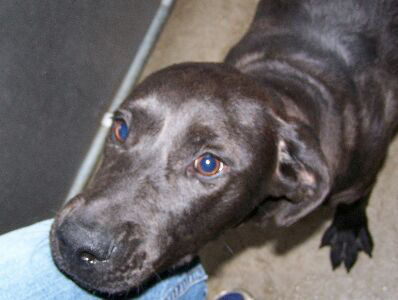

In [16]:
image_dataset[0]["image"]

### Audio datasets

Audio files are decoded using torchaudio or librosa using to the sampling rate of your choice.

To read mp3 files you need ffmpeg and restart your runtime

In [ ]:
!add-apt-repository -y ppa:jonathonf/ffmpeg-4 && apt update && apt install -y ffmpeg

In [1]:
from datasets import load_dataset
audio_dataset = load_dataset("common_voice", "fi", split="train")
audio_dataset[0]

{'client_id': '4eeeb22a3bbb52e5215593a09a845f0f8c496e0a7c498c6d1e9e5e0f8730f79bf16b2b30483dfcc771d430918f27e3ce8b546d068017302109c5c76ca75b0944',
 'path': '/root/.cache/huggingface/datasets/downloads/extracted/cb1c332c2b5d74b2663eb9d5a6181c2972a0a069831f91fadaac8362eb7899fe/cv-corpus-6.1-2020-12-11/fi/clips/common_voice_fi_22986631.mp3',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/cb1c332c2b5d74b2663eb9d5a6181c2972a0a069831f91fadaac8362eb7899fe/cv-corpus-6.1-2020-12-11/fi/clips/common_voice_fi_22986631.mp3',
  'array': array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         -1.0492604e-06,  4.0674564e-07,  8.7091979e-07], dtype=float32),
  'sampling_rate': 48000},
 'sentence': 'Mitä nyt tekisimme?',
 'up_votes': 2,
 'down_votes': 0,
 'age': 'thirties',
 'gender': 'male',
 'accent': '',
 'locale': 'fi',
 'segment': "''"}

In [4]:
audio_dataset[0]["audio"]["array"], audio_dataset[0]["audio"]["sampling_rate"]

(array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -1.0492604e-06,  4.0674564e-07,  8.7091979e-07], dtype=float32), 48000)

Audio decoding and resampling is done in-the-fly when accessing examples. You can change the sampling rate this way:

In [5]:
from datasets import Audio
audio_dataset = audio_dataset.cast_column("audio", Audio(sampling_rate=16_000))
audio_dataset[0]["audio"]["array"], audio_dataset[0]["audio"]["sampling_rate"]

(array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -4.7048442e-07, -1.0070873e-06, -5.2613052e-07], dtype=float32), 16000)

## formatting outputs for PyTorch, Tensorflow, Numpy, Pandas

Now that we have tokenized our inputs, we probably want to use this dataset in a `torch.Dataloader` or a `tf.data.Dataset`. There are various ways to approach this.

Using the `set_format()` method, we can:

- format the indexing (`__getitem__`) to return numpy/pytorch/tensorflow tensors, instead of python objects, and
- format the indexing (`__getitem__`) to return only the subset of the columns that we need for our model inputs.

  We don't want the columns `id` or `title` as inputs to train our model, but we could still want to keep them in the dataset, for instance for the evaluation of the model.
    
This is handled by the `.set_format(type: Union[None, str], columns: Union[None, str, List[str]])` where:

- `type` define the return type for our dataset `__getitem__` method and is one of `[None, 'numpy', 'pandas', 'torch', 'tensorflow']` (`None` means return python objects), and
- `columns` define the columns returned by `__getitem__` and takes the name of a column in the dataset or a list of columns to return (`None` means return all columns).

In [ ]:
columns_to_return = ['input_ids', 'token_type_ids', 'attention_mask', 'start_positions', 'end_positions']

# Uncomment whichever one is appropriate for you
# encoded_dataset.set_format(type='torch', columns=columns_to_return)
encoded_dataset.set_format(type='tensorflow', columns=columns_to_return)

# Our dataset indexing output is now ready for being used in a pytorch dataloader
pprint(encoded_dataset[1], compact=True)

2021-12-08 17:46:09.732495: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


{'attention_mask': <tf.Tensor: shape=(172,), dtype=int64, numpy=
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])>,
 'end_positions': <tf.Tensor: shape=(), dtype=int64, numpy=46>,
 'input_ids': <tf.Tensor: shape=(172,), dtype=int64, numpy=
array([  101,  3198,  5308,  1851,  1108,  1126,  1237,  1709,  1342,
        1106,  4959,  1103,  3628,  1104,  1103,  1305,  2289,  1453,
         113,  4279,   114,  1111,  1103,  1410,  1265,   119,  1109,
        1237,  2289,  3047

2021-12-08 17:46:09.738904: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-08 17:46:09.740187: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-08 17:46:09.742088: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-08 17:46:09.744503: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [ ]:
# Note that the columns are not removed from the dataset, just not returned when calling __getitem__
# Similarly the inner type of the dataset is not changed to torch.Tensor, the conversion and filtering is done on-the-fly when querying the dataset
print(encoded_dataset.column_names)

['answers', 'attention_mask', 'context', 'end_positions', 'id', 'input_ids', 'question', 'start_positions', 'title', 'token_type_ids']


In [ ]:
# We can remove the formatting with `.reset_format()`
# or, identically, a call to `.set_format()` with no arguments
encoded_dataset.reset_format()

pprint(encoded_dataset[1], compact=True)

{'answers': {'answer_start': [249, 249, 249],
             'text': ['Carolina Panthers', 'Carolina Panthers',
                      'Carolina Panthers']},
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'context': 'Super Bowl 50 was an American football game to determine the '
            'champion of the National Football League (NFL) for the 2015

In [ ]:
# The current format can be checked with `.format`,
# which is a dict of the type and formatting
pprint(encoded_dataset.format)

{'columns': ['answers',
             'attention_mask',
             'context',
             'end_positions',
             'id',
             'input_ids',
             'question',
             'start_positions',
             'title',
             'token_type_ids'],
 'format_kwargs': {},
 'output_all_columns': False,
 'type': None}


There is also a convenience method, `to_tf_dataset()`, for the creation of `tf.data.Dataset` objects directly from a HuggingFace `Dataset`. An example will be shown below - when using this method, it is sufficient to pass the `columns` argument and your `DataCollator` - make sure you set the `return_tensors` argument of your `DataCollator` to `tf` or `np`, though, because TensorFlow won't be happy if you start passing it PyTorch Tensors!

# Wrapping this all up

Let's wrap this all up with the full code to load and prepare SQuAD for training a PyTorch or TensorFlow model from HuggingFace `transformers` library.



In [ ]:
!pip install transformers

In [ ]:
import torch 
from datasets import load_dataset
from transformers import BertTokenizerFast

# Load our training dataset and tokenizer
dataset = load_dataset('squad')
tokenizer = BertTokenizerFast.from_pretrained('bert-base-cased')

def get_correct_alignement(context, answer):
    """ Some original examples in SQuAD have indices wrong by 1 or 2 character. We test and fix this here. """
    gold_text = answer['text'][0]
    start_idx = answer['answer_start'][0]
    end_idx = start_idx + len(gold_text)
    if context[start_idx:end_idx] == gold_text:
        return start_idx, end_idx       # When the gold label position is good
    elif context[start_idx-1:end_idx-1] == gold_text:
        return start_idx-1, end_idx-1   # When the gold label is off by one character
    elif context[start_idx-2:end_idx-2] == gold_text:
        return start_idx-2, end_idx-2   # When the gold label is off by two character
    else:
        raise ValueError()

# Tokenize our training dataset
def convert_to_features(example_batch):
    # Tokenize contexts and questions (as pairs of inputs)
    encodings = tokenizer(example_batch['context'], example_batch['question'], truncation=True)

    # Compute start and end tokens for labels using Transformers's fast tokenizers alignement methods.
    start_positions, end_positions = [], []
    for i, (context, answer) in enumerate(zip(example_batch['context'], example_batch['answers'])):
        start_idx, end_idx = get_correct_alignement(context, answer)
        start_positions.append(encodings.char_to_token(i, start_idx))
        end_positions.append(encodings.char_to_token(i, end_idx-1))
    encodings.update({'start_positions': start_positions, 'end_positions': end_positions})
    return encodings

encoded_dataset = dataset.map(convert_to_features, batched=True)


Reusing dataset squad (/home/matt/.cache/huggingface/datasets/squad/plain_text/1.0.0/d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453)


  0%|          | 0/2 [00:00<?, ?it/s]

Loading cached processed dataset at /home/matt/.cache/huggingface/datasets/squad/plain_text/1.0.0/d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453/cache-ff4313fac8b2cb00.arrow


  0%|          | 0/11 [00:00<?, ?ba/s]

That's the end of the shared preprocessing! Next, for Torch, we set our dataset format and create a `dataloader`. If you're using TensorFlow, skip to the next block.

In [ ]:
# Format our dataset to outputs torch.Tensor to train a pytorch model
columns = ['input_ids', 'token_type_ids', 'attention_mask', 'start_positions', 'end_positions']
encoded_dataset.set_format(type='torch', columns=columns)

# Instantiate a PyTorch Dataloader around our dataset
# Let's do dynamic batching (pad on the fly with our own collate_fn)
def collate_fn(examples):
    return tokenizer.pad(examples, return_tensors='pt')
dataloader = torch.utils.data.DataLoader(encoded_dataset['train'], collate_fn=collate_fn, batch_size=8)

For TensorFlow, we use the `to_tf_dataset()` method to get a `tf.data.Dataset`.

In [ ]:
columns = ['input_ids', 'token_type_ids', 'attention_mask', 'start_positions', 'end_positions']

# Let's do dynamic batching (pad on the fly with our own collate_fn)
def collate_fn(examples):
    return tokenizer.pad(examples, return_tensors='np')

# to_tf_dataset() returns a tf.data.Dataset that we can pass straight to model.fit().
encoded_tf_dataset = encoded_dataset['train'].to_tf_dataset(
    columns=columns,
    collate_fn=collate_fn,
    batch_size=8,
    shuffle=True,
)

Next, we initialize our model. The next two blocks show model creation and training in Torch. For TensorFlow, skip ahead!

In [ ]:
# Let's load a pretrained Bert model and a simple optimizer
from transformers import AutoModelForQuestionAnswering

model = AutoModelForQuestionAnswering.from_pretrained('distilbert-base-cased', return_dict=True)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)

In [ ]:
# Now let's train our model
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model.train().to(device)
for i, batch in enumerate(dataloader):
    batch.to(device)
    outputs = model(**batch)
    loss = outputs.loss
    loss.backward()
    optimizer.step()
    model.zero_grad()
    print(f'Step {i} - loss: {loss:.3}')
    if i > 5:
        break

Next, we'll initialize and train our TensorFlow model. Note the lack of a loss argument when we `compile()` our model here! All Transformers models support computing loss internally. When no loss argument is provided, the model will use its internal loss - this is especially helpful for cases like QA models, when the loss can be quite complex.

In [ ]:
# Let's load a pretrained Bert model and a simple optimizer
from transformers import TFAutoModelForQuestionAnswering
import tensorflow as tf

model = TFAutoModelForQuestionAnswering.from_pretrained('distilbert-base-cased')
# No loss argument!
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5))

2021-12-08 17:46:45.968015: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2021-12-08 17:46:46.397677: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
Some layers from the model checkpoint at distilbert-base-cased were not used when initializing TFDistilBertForQuestionAnswering: ['vocab_projector', 'vocab_transform', 'vocab_layer_norm', 'activation_13']
- This IS expected if you are initializing TFDistilBertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassificati

Now that all the preprocessing is done, training is an extremely comforting single line of Keras. We stop training early with the `steps_per_epoch` argument - you should probably leave that one out of your actual production code!

In [ ]:
model.fit(encoded_tf_dataset, epochs=1, steps_per_epoch=3)

2021-12-08 17:46:46.640604: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


3/3 [==============================] - 5s 85ms/step - loss: 5.5924


Example with a NER metric: `seqeval`

In [ ]:
!pip install evaluate
import evaluate
ner_metric = evaluate.load('seqeval')
references = [['O', 'O', 'O', 'B-MISC', 'I-MISC', 'I-MISC', 'O'], ['B-PER', 'I-PER', 'O']]
predictions =  [['O', 'O', 'B-MISC', 'I-MISC', 'I-MISC', 'I-MISC', 'O'], ['B-PER', 'I-PER', 'O']]
ner_metric.compute(predictions=predictions, references=references)

# Adding a new dataset

Datasets can be added with a direct upload using `my_dataset.push_to_hub('<username>/<my_dataset_name>')` to a user or organization  on the Hugging Face Hub (like for models in `transformers`). In this case the dataset will be accessible under the gien user/organization name, e.g. `datasets.load_dataset('thomwolf/squad')`.

You can also upload your data files directly on the website (see [step-by-step guide here](https://huggingface.co/docs/datasets/upload_dataset)) or using git (see [how to do it using git](https://huggingface.co/docs/datasets/share)).